In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-baru/data-churn.csv')

In [ ]:
# Menampilkan nama kolom
print(df.columns)

Index(['Company name', 'Service_types', 'Packet_service', 'Media_transmisi',
       'Bandwidth', 'State', 'Partner', 'Contract', 'Complaint', 'Churn'],
      dtype='object')


In [ ]:
#melihat type data kolom
print(df.dtypes)

Company name        object
Service_types       object
Packet_service      object
Media_transmisi     object
Bandwidth          float64
State               object
Partner             object
Contract            object
Complaint           object
Churn               object
dtype: object


In [ ]:
#menghapus kolom Company_name
df = df.drop(columns=['Company name'])

In [ ]:
# Menampilkan nama kolom
print(df.columns)

Index(['Service_types', 'Packet_service', 'Media_transmisi', 'Bandwidth',
       'State', 'Partner', 'Contract', 'Complaint', 'Churn'],
      dtype='object')


In [ ]:
#melihat nilai kolom yang unique
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Service_types: ['Corporate' 'Retail' nan]
Packet_service: ['Permana Home' 'Permana Link' 'Permana Dedicated' 'Permana Hosta'
 'Permana Colocation' 'Permana Metro' nan]
Media_transmisi: ['Wireless' 'Fiber Optic' 'Ethernet' 'Direct Kabel' nan]
State: ['Kepulauan Riau' 'DKI Jakarta' 'Aceh' 'Jawa Barat' 'Jawa Tengah'
 'Jakarta' 'Sumatera Utara' 'Riau' 'Banten' 'Jawa Timur'
 'Kalimantan Timur' 'Kalimantan Barat' 'Sulawesi Selatan' nan]
Partner: ['Yes' 'No' nan]
Contract: ['Yearly' 'Monthly' nan]
Complaint: ['No' 'Yes' nan]
Churn: ['No' 'Yes' nan]


In [ ]:
#melihat sample data
df.sample(5)

,Service_types,Packet_service,Media_transmisi,Bandwidth,State,Partner,Contract,Complaint,Churn
37,Corporate,Permana Home,Wireless,20.0,Kepulauan Riau,Yes,Yearly,No,No
88,Corporate,Permana Hosta,Wireless,100.0,Riau,Yes,Yearly,No,No
291,Corporate,Permana Home,Wireless,25.0,Kepulauan Riau,Yes,Yearly,No,No
99,Corporate,Permana Home,Direct Kabel,25.0,Kepulauan Riau,Yes,Yearly,No,No
450,Retail,Permana Home,Fiber Optic,30.0,Sumatera Utara,No,Yearly,Yes,Yes


In [ ]:
print("\nNaN dalam DataFrame:")
print(df.isnull())


NaN dalam DataFrame:
     Service_types  Packet_service  Media_transmisi  Bandwidth  State  \
0            False           False            False      False  False   
1            False           False            False      False  False   
2            False           False            False      False  False   
3            False           False            False      False  False   
4            False           False            False      False  False   
..             ...             ...              ...        ...    ...   
845          False           False            False      False  False   
846          False           False            False      False  False   
847          False           False            False      False  False   
848          False           False            False      False  False   
849           True            True             True       True   True   

     Partner  Contract  Complaint  Churn  
0      False     False      False  False  
1      False   

In [ ]:
print("Lima baris terakhir dari DataFrame:")
print(df.tail())

Lima baris terakhir dari DataFrame:
    Service_types Packet_service Media_transmisi  Bandwidth           State  \
845        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara   
846        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara   
847        Retail   Permana Home     Fiber Optic       30.0  Kepulauan Riau   
848        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara   
849           NaN            NaN             NaN        NaN             NaN   

    Partner Contract Complaint Churn  
845      No  Monthly        No    No  
846      No  Monthly        No    No  
847      No  Monthly        No    No  
848      No   Yearly        No    No  
849     NaN      NaN       NaN   NaN  


In [ ]:
# Menghapus baris yang mengandung NaN
df = df.dropna()
print("DataFrame setelah menghapus baris yang mengandung NaN:")
print(df)

DataFrame setelah menghapus baris yang mengandung NaN:
    Service_types Packet_service Media_transmisi  Bandwidth           State  \
0       Corporate   Permana Home        Wireless       10.0  Kepulauan Riau   
1       Corporate   Permana Home        Wireless       20.0  Kepulauan Riau   
2       Corporate   Permana Link        Wireless       30.0  Kepulauan Riau   
3       Corporate   Permana Link     Fiber Optic       20.0  Kepulauan Riau   
4       Corporate   Permana Link        Wireless       20.0  Kepulauan Riau   
..            ...            ...             ...        ...             ...   
844        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara   
845        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara   
846        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara   
847        Retail   Permana Home     Fiber Optic       30.0  Kepulauan Riau   
848        Retail   Permana Home     Fiber Optic       30.0  Sumatera Utara 

In [ ]:
#mengubah data Yes/No ke 1/0
yes_no_columns = ['Partner','Complaint', 'Churn']
for col in yes_no_columns:
  df[col].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
#mengubah nilai menjadi 1/0
df['Service_types'].replace({'Retail':0, 'Corporate':1},inplace=True)

df['Contract'].replace({'Yearly':1, 'Monthly':0},inplace=True)

In [ ]:
#mapping

df['State'].replace({'Kepulauan Riau':0, 'DKI Jakarta':1, 'Aceh':2, 'Jawa Barat':3, 'Jawa Tengah':4,
 'Jakarta':5, 'Sumatera Utara':6, 'Riau':7, 'Banten':8, 'Jawa Timur':9,
 'Kalimantan Timur':10, 'Kalimantan Barat':11, 'Sulawesi Selatan':12},inplace=True)

df['Packet_service'].replace({'Permana Home':0, 'Permana Link':1, 'Permana Dedicated':2, 'Permana Hosta':3,
 'Permana Colocation':4, 'Permana Metro':5},inplace=True)

df['Media_transmisi'].replace({'Wireless':0, 'Fiber Optic':1, 'Ethernet':2, 'Direct Kabel':3},inplace=True)

In [ ]:
#melihat type data kolom
print(df.dtypes)

Service_types        int64
Packet_service       int64
Media_transmisi      int64
Bandwidth          float64
State                int64
Partner              int64
Contract             int64
Complaint            int64
Churn                int64
dtype: object


In [ ]:
# Mengubah semua kolom dari float ke int
df.astype(int)

,Service_types,Packet_service,Media_transmisi,Bandwidth,State,Partner,Contract,Complaint,Churn
0,1,0,0,10,0,1,1,0,0
1,1,0,0,20,0,1,1,0,0
2,1,1,0,30,0,1,1,0,0
3,1,1,1,20,0,1,1,0,0
4,1,1,0,20,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
844,0,0,1,30,6,0,0,0,0
845,0,0,1,30,6,0,0,0,0
846,0,0,1,30,6,0,0,0,0
847,0,0,1,30,0,0,0,0,0


In [ ]:
#melihat type data kolom
print(df.dtypes)

Service_types        int64
Packet_service       int64
Media_transmisi      int64
Bandwidth          float64
State                int64
Partner              int64
Contract             int64
Complaint            int64
Churn                int64
dtype: object


In [ ]:
#train dan test split
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Gabungkan kembali data yang telah di-scaling dengan target
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])  # Kolom terakhir adalah Churn yang bukan fitur

# Tambahkan kolom Churn kembali
df_scaled['Churn'] = df['Churn']

# Simpan DataFrame ke dalam file CSV
file_path = 'preprocessed_data.csv'
df_scaled.to_csv(file_path, index=False)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense

# Definisikan model BiLSTM dalam sebuah fungsi
def create_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(units=64, return_sequences=True), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(units=64, return_sequences=True)),
        Dropout(0.2),
        Bidirectional(LSTM(units=64)),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

# Inisialisasi K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Simpan hasil dari setiap fold
results = []
confusion_matrices = []

for train_index, val_index in kfold.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Reshape data untuk sesuai dengan input model
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # Buat dan latih model
    model = create_bilstm_model((X_train_reshaped.shape[1], 1))
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

    # Evaluasi model pada data validasi
    y_pred = (model.predict(X_val_reshaped) > 0.5).astype("int32")
    scores = model.evaluate(X_val_reshaped, y_val, verbose=0)
    results.append(scores[1])  # Menyimpan akurasi dari setiap fold

    # Simpan confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    confusion_matrices.append(cm)

# Rata-rata hasil cross-validation
mean_accuracy = np.mean(results)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy}")

Epoch 1/10
22/22 [==============================] - 13s 60ms/step - loss: 0.5392 - accuracy: 0.7717
Epoch 2/10
22/22 [==============================] - 1s 60ms/step - loss: 0.3221 - accuracy: 0.8630
Epoch 3/10
22/22 [==============================] - 1s 63ms/step - loss: 0.3053 - accuracy: 0.8557
Epoch 4/10
22/22 [==============================] - 2s 85ms/step - loss: 0.2794 - accuracy: 0.8866
Epoch 5/10
22/22 [==============================] - 2s 73ms/step - loss: 0.2713 - accuracy: 0.8881
Epoch 6/10
22/22 [==============================] - 2s 75ms/step - loss: 0.2620 - accuracy: 0.8866
Epoch 7/10
22/22 [==============================] - 2s 73ms/step - loss: 0.2562 - accuracy: 0.8866
Epoch 8/10
22/22 [==============================] - 2s 70ms/step - loss: 0.2525 - accuracy: 0.8866
Epoch 9/10
22/22 [==============================] - 2s 73ms/step - loss: 0.2551 - accuracy: 0.8866
Epoch 10/10
6/6 [==============================] - 2s 9ms/step
Epoch 1/10
22/22 [===========================

In [ ]:
# Rata-rata hasil cross-validation
mean_accuracy = np.mean(results)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy}")

Mean Cross-Validation Accuracy: 0.8939644932746887


In [ ]:
# Rata-rata confusion matrix dari setiap fold
average_cm = np.mean(confusion_matrices, axis=0)

print("Confusion Matrices for each fold:")
for i, cm in enumerate(confusion_matrices):
    print(f"Fold {i + 1}:")
    print(cm)


Confusion Matrices for each fold:
Fold 1:
[[142   0]
 [ 13  15]]
Fold 2:
[[131   0]
 [ 21  18]]
Fold 3:
[[141   0]
 [ 20   9]]
Fold 4:
[[143   0]
 [ 14  13]]
Fold 5:
[[136   0]
 [ 22  11]]


In [ ]:
print("Average Confusion Matrix:")
print(average_cm)

Average Confusion Matrix:
[[138.6   0. ]
 [ 18.   13.2]]


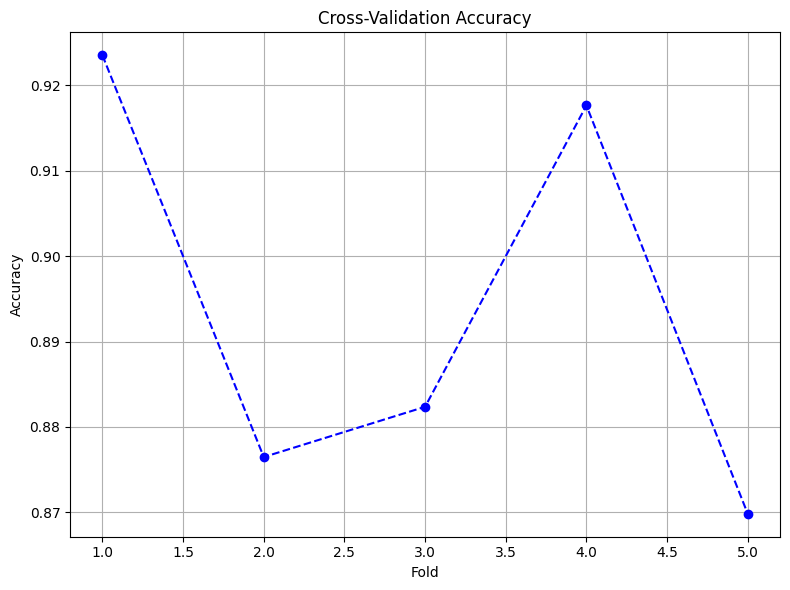

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil cross-validation
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(results) + 1), results, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

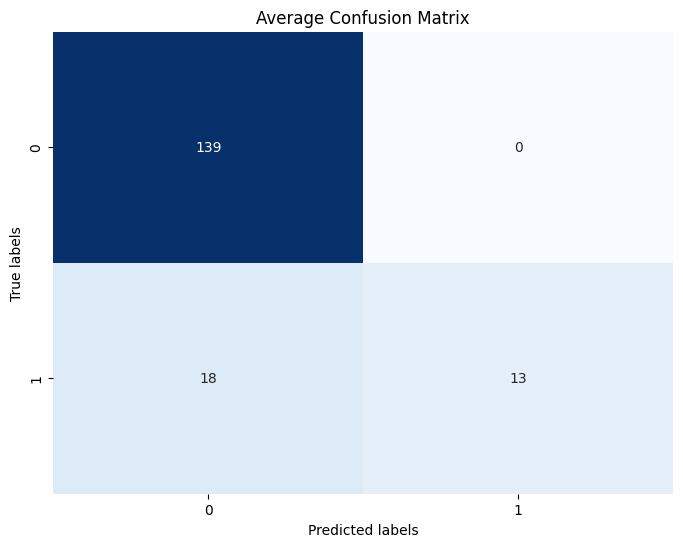

In [ ]:
import seaborn as sns

# Visualisasi average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, cmap='Blues', fmt='.0f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Average Confusion Matrix')
plt.show()

In [ ]:
# laporan klasifikasi untuk setiap fold
for i, (train_index, val_index) in enumerate(kfold.split(X_scaled)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    model = create_bilstm_model((X_train_reshaped.shape[1], 1))
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = (model.predict(X_val_reshaped) > 0.5).astype("int32")
    print(f"Classification Report for fold {i + 1}:")
    print(classification_report(y_val, y_pred))

6/6 [==============================] - 2s 17ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       142
           1       1.00      0.54      0.70        28

    accuracy                           0.92       170
   macro avg       0.96      0.77      0.83       170
weighted avg       0.93      0.92      0.91       170

6/6 [==============================] - 2s 9ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       131
           1       1.00      0.46      0.63        39

    accuracy                           0.88       170
   macro avg       0.93      0.73      0.78       170
weighted avg       0.89      0.88      0.86       170

6/6 [==============================] - 2s 8ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

           0       0.88      1.00  